In [ ]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import skimage.transform
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
!pip install mtcnn

In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

In [ ]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, keras, h5py, numpy, pillow, six, pyyaml
Required-by: 


In [ ]:
import mtcnn
mtcnn_model = mtcnn.MTCNN()

In [ ]:
import keras_vggface
from keras_vggface.utils import decode_predictions
from keras_vggface.utils import preprocess_input

In [ ]:
# create an instance of the vggface model
vgg_model = keras_vggface.VGGFace(model='resnet50')
print('Inputs:', vgg_model.inputs)
print('Outputs:', vgg_model.outputs)

Inputs: [<tf.Tensor 'input_2:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'classifier_1/Softmax:0' shape=(None, 8631) dtype=float32>]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
face_path = '/content/drive/My Drive/00AA-SIGG/SIGGRAPH Now_Machine Learning Webinar/faces/'
names_faces = {
    # name        :  face 
    'RajeshSharma'   : 'Rajesh1.jpg',
    'AlbertoMartin'  : 'AlbertoMartin1.jpg',
    'Donovan'        : 'Donovan1.jpg',
    'Gabriel'        : 'GabrielZ1.jpg',
    'Gerrit'         : 'Gerrit1.jpg',
    'JesusH'         : 'JesusH1.jpg',
    'JonathanM'      : 'JonathanM1.jpg',
    'LouH'           : 'LouH1.jpg',
    'MartinA'        : 'MartinA1.jpg',
    'Randi'          : 'Randi1.jpg',
    'ThanhP'         : 'ThanhP1.jpg',
    'SabrinaK'       : 'SabrinaK1.jpg',
    'SharonS'        : 'sharon_stone1.jpg'
}
print(names_faces)

{'RajeshSharma': 'Rajesh1.jpg', 'AlbertoMartin': 'AlbertoMartin1.jpg', 'Donovan': 'Donovan1.jpg', 'Gabriel': 'GabrielZ1.jpg', 'Gerrit': 'Gerrit1.jpg', 'JesusH': 'JesusH1.jpg', 'JonathanM': 'JonathanM1.jpg', 'LouH': 'LouH1.jpg', 'MartinA': 'MartinA1.jpg', 'Randi': 'Randi1.jpg', 'ThanhP': 'ThanhP1.jpg', 'SabrinaK': 'SabrinaK1.jpg', 'SharonS': 'sharon_stone1.jpg'}



 RajeshSharma


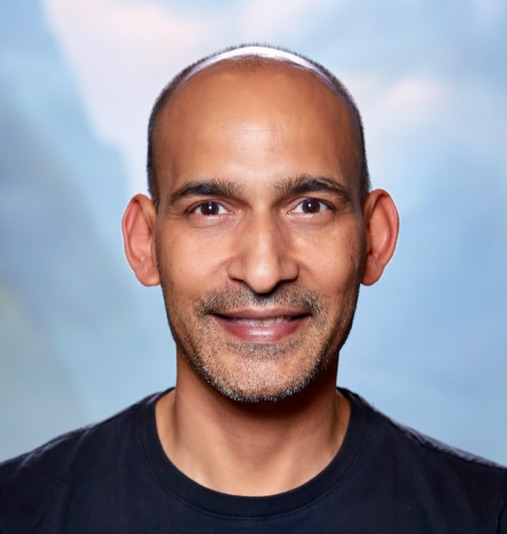


 AlbertoMartin


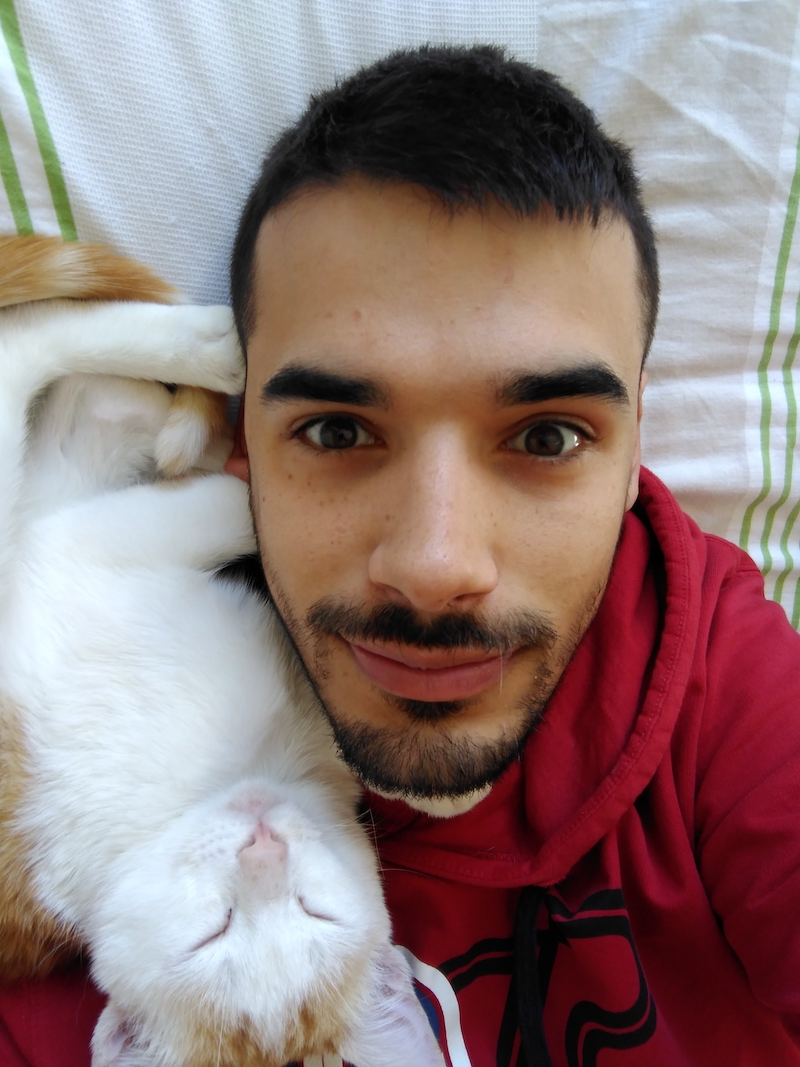


 Donovan


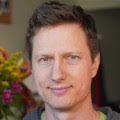


 Gabriel


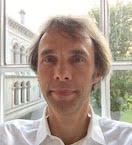


 Gerrit


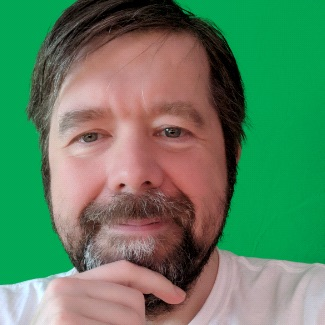


 JesusH


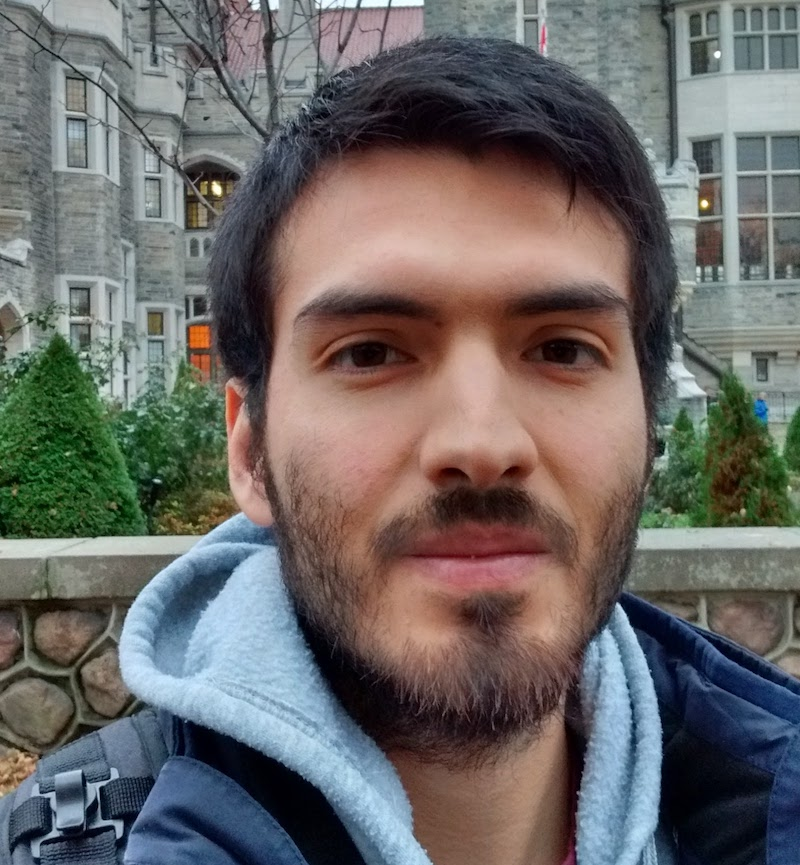


 JonathanM


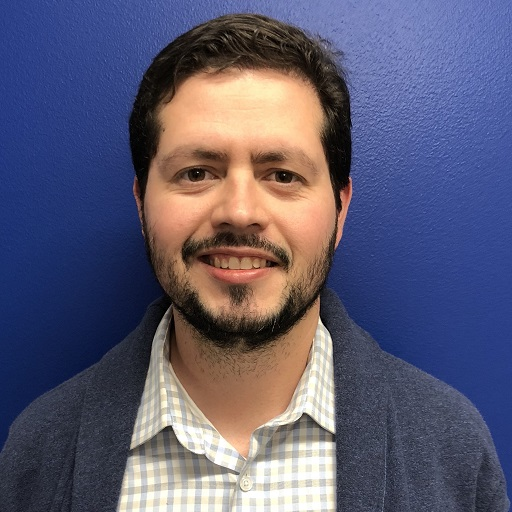


 LouH


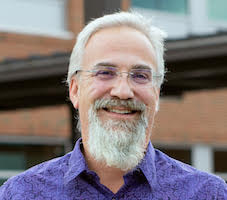


 MartinA


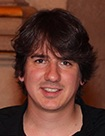


 Randi


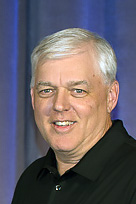


 ThanhP


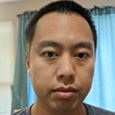


 SabrinaK


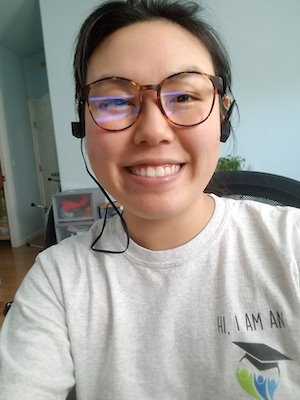


 SharonS


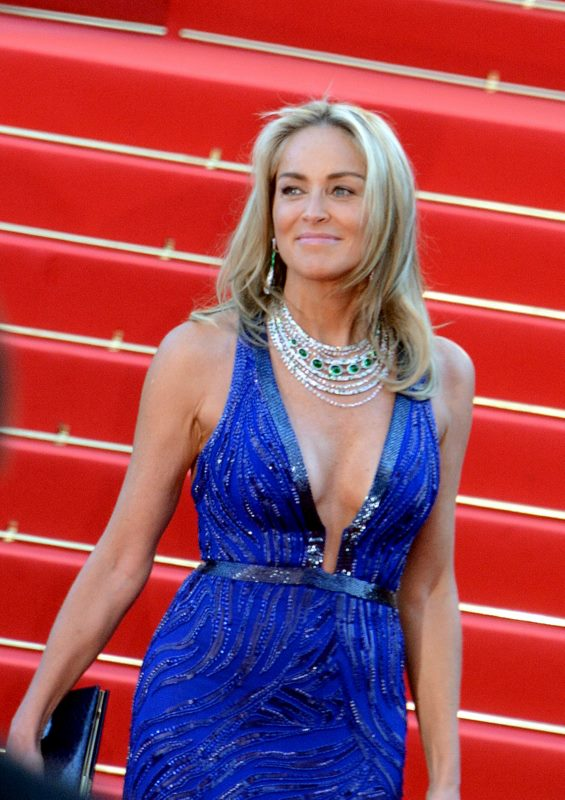

In [ ]:
# read the images into the dictionary
for name, face in names_faces.items(): 
    # replace file names with actual images in the dictionary
    img = cv2.imread(face_path+face)
    # cv2 by default stores images in BGR format, store in RGB
    names_faces[name] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print('\n', name)
    cv2_imshow(img)

In [ ]:
def vgg_match(img, x, y, w, h):
  #only the face part
  face_only = img[y:y+h, x:x+w, :]
  # resize to 224x224 (without stretching) 
  face_only = skimage.transform.resize(face_only,(224, 224), mode='reflect', preserve_range=True)
  # prep image in format that vgg expects
  face_only_batch = np.expand_dims(face_only, 0)
  face_only = preprocess_input(face_only_batch, version=2)
  # find encoding
  prediction = vgg_model.predict(face_only)
  return prediction
  

In [ ]:
def match_faces(face_dict):
    for name, face in face_dict.items():
        # find face-like regions in the image
        detected_faces = mtcnn_model.detect_faces(face)
        # extract details of the face
        for i in range(0, len(detected_faces)):
            x, y, w, h = detected_faces[i]['box']
            vgg_prediction = vgg_match(face, x, y, w, h)
            matches = decode_predictions(vgg_prediction)
            # display most likely results
            print(name)
            for match in matches[0]:
	              print('%s: %.3f%%' % (match[0], match[1]*100))
            print('') 
            break # assume only one face per image   

In [ ]:
match_faces(names_faces)

RajeshSharma
b' Keegan-Michael_Key': 6.683%
b' Stomy_Bugsy': 6.621%
b' Mark_Medlock': 6.309%
b' Apurva_Agnihotri': 3.785%
b' Bhakti_Charu_Swami': 2.565%

AlbertoMartin
b' Luca_Marin': 59.564%
b' Rodrigo_Santoro': 4.248%
b' Darian_\xc3\x81lvarez': 4.104%
b' Aar\xc3\xb3n_D\xc3\xadaz': 2.742%
b' Damien_Sargue': 2.095%

Donovan
b' Maciej_Stuhr': 20.821%
b' Steve_Windolf': 9.195%
b' Dietrich_Br\xc3\xbcggemann': 8.932%
b' Danny_Alexander': 7.599%
b' Alan_Mulally': 4.988%

Gabriel
b' Cliff_Richards': 6.434%
b' Uday_Chopra': 5.626%
b' Daniel_Gimeno-Traver': 4.730%
b' Roberto_Palazuelos': 3.065%
b' Dave_Wyndorf': 2.855%

Gerrit
b' Toby_Keith': 29.544%
b' Guillaume_de_Tonqu\xc3\xa9dec': 12.076%
b' J\xc3\xbcrgen_von_der_Lippe': 4.295%
b' Armistead_Maupin': 2.212%
b' Rick_Gervais': 1.311%

JesusH
b' Sami_Yusuf': 9.901%
b' Egbert_Jan_Weeber': 6.369%
b' \xc4\xb0smail_YK': 5.618%
b' Hamit_Alt\xc4\xb1ntop': 4.163%
b' Carlos_Sainz_Jr.': 3.671%

JonathanM
b' Clifton_Collins_Jr.': 5.461%
b' Pooja_Bhatt':